# Data Science & Business Analytics Task

## Prediction using Supervised Machine Learning
## #Task 1 : To predict the percentage of an student based on the no. of study hours.

 Importing required libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

Reading Data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")

Data is aligned in a tabular fashion in rows and columns.

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Information regarding the data.

Dimension of the DataFrame

In [4]:
data.shape

(25, 2)

Some basic statistical details of the data. 

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The info() function is used to print a concise summary of a DataFrame 
( includes index dtype and column dtypes, non-null values and memory usage)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The null()function is used to check the null values in the data.

In [16]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## For visualizing our dataset to predict the relation between the data, lets plot it on 2D.

Ploting using matplotlib library

Scatter Plot

Text(0.5, 1.0, 'Score vs Hour')

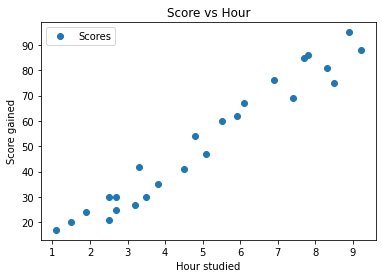

In [8]:
data.plot(x='Hours',y='Scores',style='o')
py.xlabel('Hour studied')
py.ylabel('Score gained')
py.title('Score vs Hour')


Bar Plot

Text(0.5, 1.0, 'Score vs Hour')

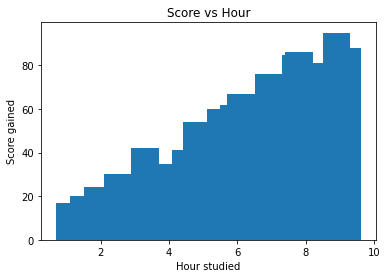

In [9]:
x = data.iloc[:,0].values  
y = data.iloc[:, 1].values  
py.bar(x,y)
py.xlabel('Hour studied')
py.ylabel('Score gained')
py.title('Score vs Hour')



From the graphs we can see that hours and scores are directly proportional i.e share positive linear relation.

## Preparing the data.
The train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data

In [10]:
x = data.iloc[:,:-1].values   

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Training the Algorithm
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Ploting the linear regression

In [13]:
line=regressor.coef_*x+regressor.intercept_

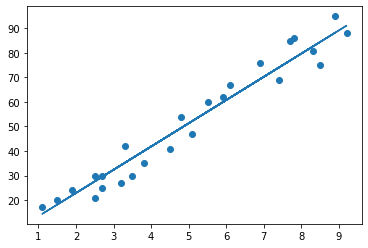

In [14]:
py.scatter(x,y)
py.plot(x,line)
py.show()

## Making Prediction

In [15]:
yPred=regressor.predict(X_test)

In [17]:
X_test

array([[7.8],
       [8.9],
       [9.2],
       [4.5],
       [3.8]])

In [18]:
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': yPred})  


In [19]:
df

,Actual Scores,Predicted Scores
0,86,77.886128
1,95,88.322103
2,88,91.168278
3,41,46.578201
4,35,39.937126


## Task Work
To predict score if a student studies for 9.25 hrs/ day.

In [20]:
x_val=[[9.25]]
y_val=regressor.predict(x_val)

In [21]:
y_val

array([91.64264056])

## Evaluating the algorithm
 To calculate the MSE you take the difference between your model's predictions and the ground truth, square it, and average it out across the whole dataset.

In [22]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, yPred)

5.695074960516261